<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Python-For-Finance-Stock-Analysis/blob/master/Stock_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Description: This program uses an Artificial RNN and LSTM to predict the closing price of X corporation using the past 60 days stock price

In [45]:
# import Libraries
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [46]:
# Get the stock quote
df = web.DataReader("AAPl", data_source="yahoo", start="2015-01-23", end="2020-12-23")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,28.437500,27.882500,28.075001,28.245001,185859200.0,25.729790
2015-01-26,28.590000,28.200001,28.434999,28.275000,222460000.0,25.757124
2015-01-27,28.120001,27.257500,28.105000,27.285000,382274800.0,24.855284
2015-01-28,29.530001,28.827499,29.407499,28.827499,585908400.0,26.260420
2015-01-29,29.797501,28.889999,29.080000,29.725000,337745600.0,27.077997
...,...,...,...,...,...,...
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996


In [47]:
df.shape

(1492, 6)

Text(0, 0.5, 'Close Price USD ($)')

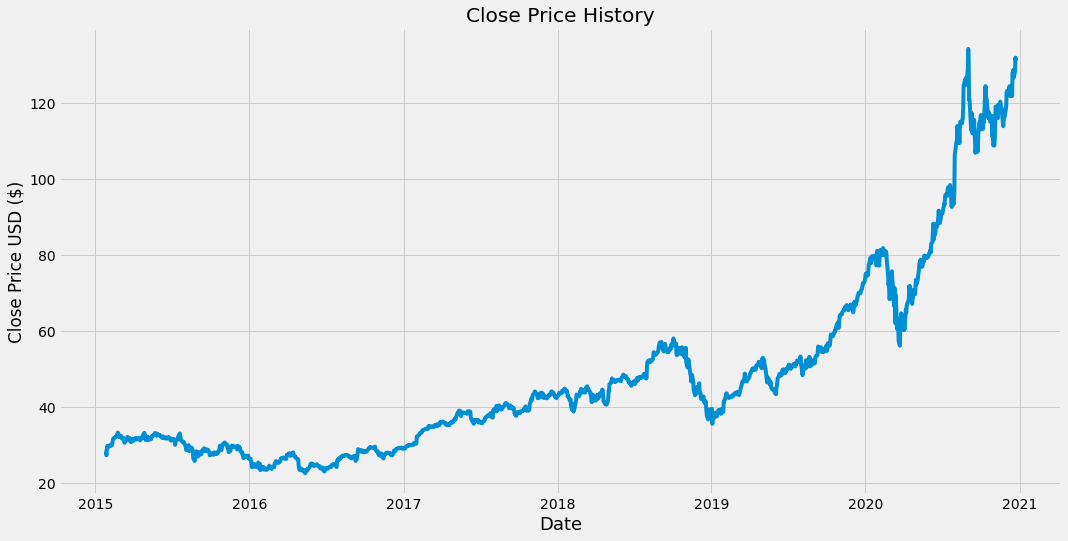

In [48]:
# Visulize the closing price
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)")

In [49]:
import math
# Create a new dataframe with only the "Close column"
data = df.filter(["Close"])
# COnvert datafram to numpy array
dataset = data.values
# Get the numbers of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1194

In [50]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.05071914],
       [0.05098796],
       [0.04211659],
       ...,
       [0.94668222],
       [0.97938987],
       [0.97114578]])

In [51]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.05071914, 0.05098796, 0.04211659, 0.05593889, 0.06398138,
       0.06008336, 0.0633765 , 0.06342132, 0.06545993, 0.06631123,
       0.06404858, 0.06581838, 0.07097093, 0.07737803, 0.08091761,
       0.08230657, 0.08398675, 0.08598057, 0.0853757 , 0.08772796,
       0.09556881, 0.09370941, 0.08613737, 0.08978898, 0.08539812,
       0.08680945, 0.08741433, 0.08557731, 0.08080561, 0.08123125,
       0.08244098, 0.07654915, 0.07146378, 0.07641472, 0.07448811,
       0.07753484, 0.08221696, 0.08542051, 0.08324747, 0.07966308,
       0.0825978 , 0.08143288, 0.07401766, 0.07594427, 0.07372643,
       0.080716  , 0.07636992, 0.07596668, 0.07836374, 0.08291143,
       0.07990951, 0.078991  , 0.08114164, 0.08235137, 0.08179131,
       0.08055918, 0.08163449, 0.08026794, 0.0770868 , 0.08347149])]
[0.08192573463050709]

[array([0.05071914, 0.05098796, 0.04211659, 0.05593889, 0.06398138,
       0.06008336, 0.0633765 , 0.06342132, 0.06545993, 0.06631123,
       0.06404858, 0.06581838, 0.07

In [52]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
x_train.shape

(1134, 60)

In [54]:
# Reshap the data
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(1134, 60, 1)

In [55]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [56]:
# Compilr the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [57]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

1134/1134 [==============================] - 26s 21ms/step - loss: 7.3358e-04


In [58]:
# Create testing data set
# Create a new array containing scaled value from index ___ to ___
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [59]:
# Convert data into numpy array
x_test = np.array(x_test)

In [60]:
x_test.shape

(298, 60)

In [61]:
# Reshape the data
x_test = np.reshape(x_test, (298, 60, 1))

In [62]:
# Get the model to predict the price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [63]:
# Get the Root Mean Square Erroe (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.4630711446672478

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


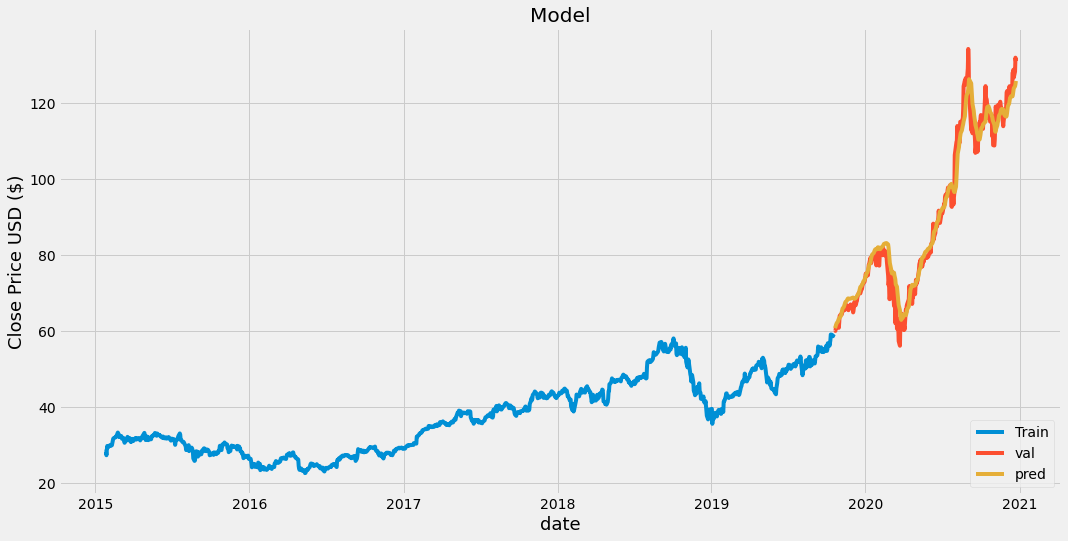

In [66]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

# Visulize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "val", "pred"], loc="lower right")
plt.show()

In [69]:
# Show the valid and prediction price
valid.head(30)

,Close,Predictions
Date,,
2019-10-21,60.127499,60.712856
2019-10-22,59.990002,61.032276
2019-10-23,60.794998,61.336342
2019-10-24,60.895000,61.692837
2019-10-25,61.645000,62.046268
2019-10-28,62.262501,62.445969
2019-10-29,60.822498,62.894741
2019-10-30,60.814999,63.150913
2019-10-31,62.189999,63.284210


In [71]:
# Get the quote
apple_quote = web.DataReader("AAPl", data_source="yahoo", start="2015-01-23", end="2020-12-23")

# Create a new datafram
new_df = apple_quote.filter(["Close"])

# Get the last 60 days closing price and convert it into numpy array
last_60_days = new_df[-60:].values

#scaled data b/w 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test = list()
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[126.52617]]


In [72]:
apple_quote2 = web.DataReader("AAPl", data_source="yahoo", start="2020-12-24", end="2020-12-24")
print(apple_quote2["Close"])

Date
2020-12-24    131.970001
Name: Close, dtype: float64
